# Project Name : BigMart Sales Prediction

## Import modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.pipeline import Pipeline 
import pickle
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import logging
logging.basicConfig(level = logging.INFO, filename = 'app.log', filemode = 'w', format = '%(asctime)s - %(levelname)s - %(message)s')

In [5]:
dt = pd.read_csv('Sales.csv')
dt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
dt.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
dt.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

## Preprocessing the dataset

In [9]:
dt.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
## All Categorical Column
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
## Identifier Columns are not required
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
## Value Count of Each Category
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int6

In [13]:
## Mean of Item_weight 
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
## Handling Item_Weight column
miss_bool = dt['Item_Weight'].isnull()
miss_bool

0        False
1        False
2        False
3        False
4         True
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, Length: 14204, dtype: bool

In [15]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])

C:\Users\sayan\AppData\Local\Temp/ipykernel_17148/4113020904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])


In [16]:
## Checking
dt['Item_Weight'].isnull().sum()

0

In [17]:
## Handling Outlet_Size column
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [19]:
## Checking
dt['Outlet_Size'].isnull().sum()

0

In [20]:
## Handling Item_Visibility column
print(sum(dt['Item_Visibility']==0))

# replace zeros with mean
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

## Checking
print(sum(dt['Item_Visibility']==0))
## Done

879
0


In [21]:
# combine item fat content
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
dt['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

# ===============================================================

## Creating New Features

In [22]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
dt['New_Item_Type']

0        FD
1        FD
2        NC
3        FD
4        FD
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    DR
Name: New_Item_Type, Length: 14204, dtype: object

In [23]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
dt['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [24]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
dt['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [25]:
# create small values for establishment year
dt['Outlet_Years'] = 2021 - dt['Outlet_Establishment_Year']

In [26]:
dt['Outlet_Years']

0        22
1        14
2        23
3        14
4        36
         ..
14199    34
14200    19
14201    17
14202    12
14203    24
Name: Outlet_Years, Length: 14204, dtype: int64

In [27]:
## Checking
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,Food,22
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,Food,14
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,NaN,Non-Consumable,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,Food,14
4,FDY38,12.792854,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Food,36


# ================================================================

# Exploratory Data Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

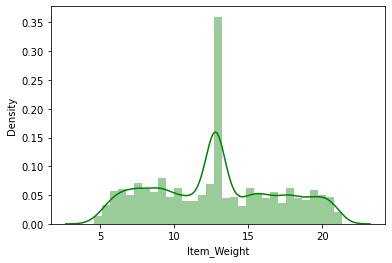

In [28]:
sns.distplot(dt['Item_Weight'],color="green",kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

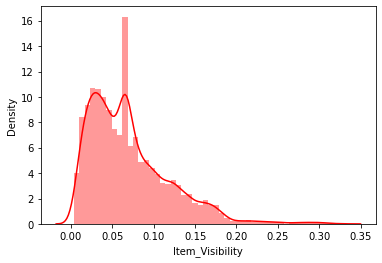

In [29]:
sns.distplot(dt['Item_Visibility'],color="red",kde=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

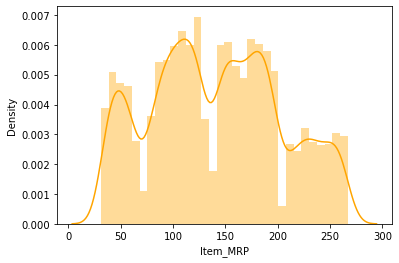

In [30]:
sns.distplot(dt['Item_MRP'],color="orange",kde=True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

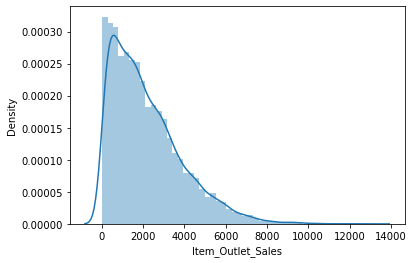

In [31]:
sns.distplot(dt['Item_Outlet_Sales'])

In [32]:
# log transformation on Target Feature
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

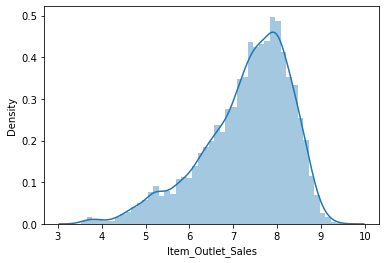

In [33]:
sns.distplot(dt['Item_Outlet_Sales'],kde=True)
## More Gaussian Distribution

In [34]:
dt['Item_Outlet_Sales'].fillna(np.mean(dt['Item_Outlet_Sales']),inplace=True)

In [35]:
np.mean(dt['Item_Outlet_Sales'])

7.297863320094165

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

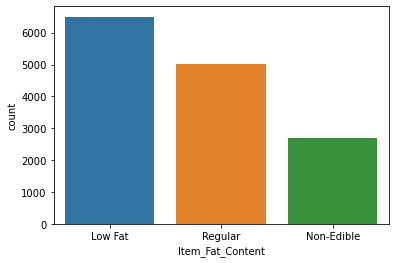

In [36]:
## Item Fat Content
sns.countplot(dt["Item_Fat_Content"])

[Text(0, 0, 'Snack Foods'),
 Text(1, 0, 'Dairy'),
 Text(2, 0, 'Others'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Baking Goods'),
 Text(5, 0, 'Health and Hygiene'),
 Text(6, 0, 'Breads'),
 Text(7, 0, 'Hard Drinks'),
 Text(8, 0, 'Seafood'),
 Text(9, 0, 'Soft Drinks'),
 Text(10, 0, 'Household'),
 Text(11, 0, 'Frozen Foods'),
 Text(12, 0, 'Meat'),
 Text(13, 0, 'Canned'),
 Text(14, 0, 'Starchy Foods'),
 Text(15, 0, 'Breakfast')]

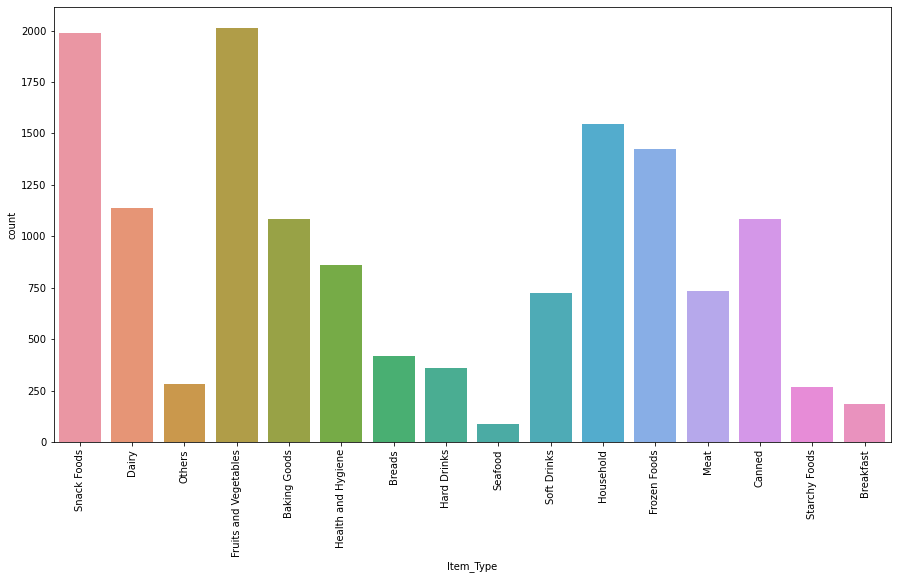

In [37]:
 plt.figure(figsize=(15,8))
l = list(dt['Item_Type'].unique())
chart = sns.countplot(dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

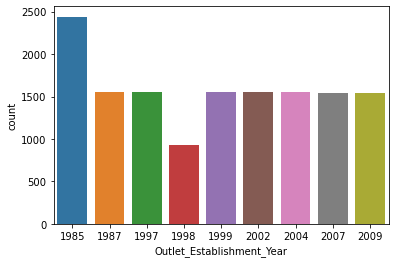

In [38]:
sns.countplot(dt['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

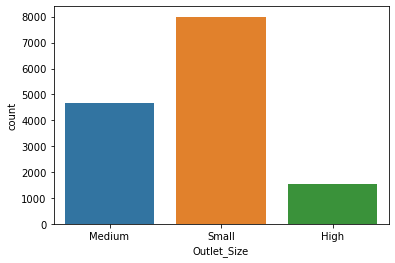

In [39]:
sns.countplot(dt['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

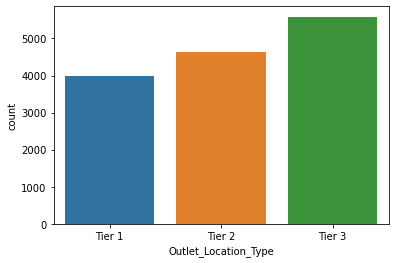

In [40]:
sns.countplot(dt['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

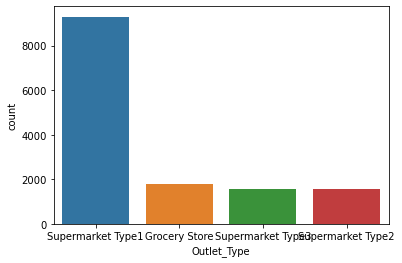

In [41]:
sns.countplot(dt['Outlet_Type'])

<AxesSubplot:>

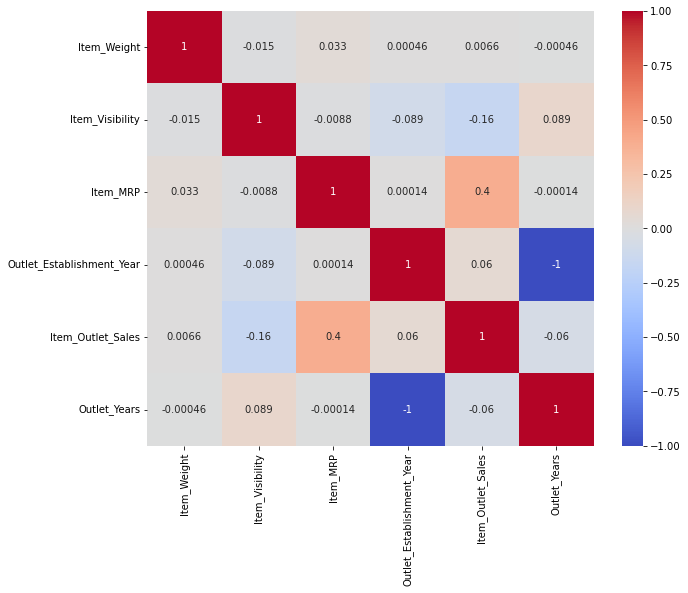

In [42]:
 plt.figure(figsize=(10,8))
corr = dt.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [43]:
## Performing Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])

In [44]:
## Checking
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,1,0,1,7.297863,1,22,9
1,FDW14,8.300000,2,0.038428,4,87.3198,OUT017,2007,2,1,1,7.297863,1,14,2
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,2,2,0,7.297863,2,23,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,2007,2,1,1,7.297863,1,14,2
4,FDY38,12.792854,2,0.118599,4,234.2300,OUT027,1985,1,2,3,7.297863,1,36,5


# Model Training

In [45]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = dt['Item_Outlet_Sales']

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state=10)


In [47]:
from sklearn.linear_model import LinearRegression,LogisticRegression,ridge_regression,ElasticNet
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [48]:
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('Linear_model', LinearRegression())])
#pipeline_logr = Pipeline([('Logistic_model', LogisticRegression())])
pipeline_ElS = Pipeline([('Elastic_model', ElasticNet())])
pipeline_dc = Pipeline([('dc_model', DecisionTreeRegressor())])
pipeline_Edc = Pipeline([('Edc_model', ExtraTreeRegressor())])
pipeline_rf = Pipeline([('rf_model', RandomForestRegressor())])
pipeline_AdB = Pipeline([('Adaboost_model', AdaBoostRegressor())])
pipeline_Bag = Pipeline([('Bagging_model', BaggingRegressor())])
pipeline_GDB = Pipeline([('Gradientboost', GradientBoostingRegressor())])
pipeline_xg = Pipeline([('xgboost', XGBRegressor())])
pipeline_xgrf = Pipeline([('xgboost', XGBRFRegressor())])

In [51]:
models = {
    'linear_regression':pipeline_lr,
    #'logistic_regression' : pipeline_logr,
    'ElasticNet' : pipeline_ElS,
    'Decision Tree' : pipeline_dc,
    'Extra Tree' : pipeline_Edc,
    'Random Forest' : pipeline_rf,
    'Adaboost' : pipeline_AdB,
    'Bagging' : pipeline_Bag,
    'Gradientboost' : pipeline_GDB,
    'XGBoost' : pipeline_xg,
    'XGBoostRF' : pipeline_xgrf,
   
}

def model_prediction(name, model):
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        MAE = mean_absolute_error(ytest,ypred)
        MSE = mean_squared_error(ytest,ypred)
        R2 = r2_score(ytest,ypred)
        print(f"Model name : {name}")
        print(f"mean_absolute_error is: {MAE}")
        print(f"mean_squared_error is: {MSE}")
        print(f"r2_score is: {R2:}\n")

        
for name, model in models.items():
    model_prediction(name, model)

Model name : linear_regression
mean_absolute_error is: 0.4983174768498015
mean_squared_error is: 0.414207858049412
r2_score is: 0.3293027711247237

Model name : ElasticNet
mean_absolute_error is: 0.5108122284425427
mean_squared_error is: 0.5160045081474987
r2_score is: 0.16447071928704915

Model name : Decision Tree
mean_absolute_error is: 0.6033058583750821
mean_squared_error is: 0.7127363746320848
r2_score is: -0.15408315437445075

Model name : Extra Tree
mean_absolute_error is: 0.6177133573240717
mean_squared_error is: 0.7296773784045634
r2_score is: -0.1815145129635276

Model name : Random Forest
mean_absolute_error is: 0.47823179078841555
mean_squared_error is: 0.38805290633812894
r2_score is: 0.3716536181529121

Model name : Adaboost
mean_absolute_error is: 0.47671785433387265
mean_squared_error is: 0.3581866437061646
r2_score is: 0.4200139261356016

Model name : Bagging
mean_absolute_error is: 0.4944431988277883
mean_squared_error is: 0.4163328500476485
r2_score is: 0.3258619232